In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib as mpl
from matplotlib import rc
# rc('text',usetex=True)
rc('font',**{'family':'serif','serif':['Times New Roman'],'size':10})
rc('mathtext',fontset='cm')
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
% config InlineBackend.rc = {'figure.figsize': (5,3.5)}
import matplotlib.gridspec as gridspec

In [3]:
import numpy as np
import random as rn

In [4]:
from scipy.spatial.distance import pdist,cdist,squareform

In [5]:
def center_axis(ax,lim=1):
    ax.axis([-lim,lim,-lim,lim])
    ax.spines['left'].set_position('zero')
    ax.spines['left'].set_alpha(0.5)
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['bottom'].set_alpha(0.5)
    ax.spines['top'].set_color('none')

In [6]:
Xp = [[-1.5,-1.5],
      [-1.0,-0.5],
      [-0.6,-1.3],
      [1.6,-1],
      [-0.8,1],
      [-1.6,-0.1]]
rp = [2,1,1.3,0.3,0.2,1]

Xn = [[0.5,0.4],
      [1.1,1.7],
      [1.8,1],
      [0.6,1.25],
      [0.2,-0.8],
      [0.9,-1.4],
      [-1.4,1.5]]
rn = [-1.0,-1.3,-0.8,-2,-0.2,-0.25,-0.5]

Xp = np.array(Xp)
rp = np.array(rp)
Xn = np.array(Xn)
rn = np.array(rn)


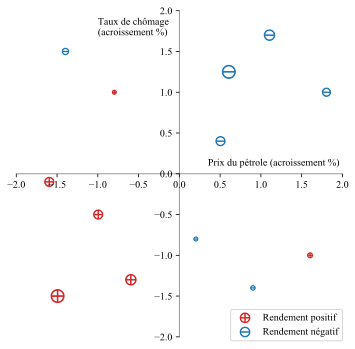

In [7]:
fig,ax = plt.subplots(1,1,subplot_kw={'aspect':1},figsize=(6,6))
ax.scatter(*Xp.T,s=100*np.abs(rp),marker='$\oplus$',color='C3',label='Rendement positif')
ax.scatter(*Xn.T,s=100*np.abs(rn),marker='$\ominus$',color='C0',label='Rendement négatif')
center_axis(ax,lim=2)
ax.annotate('Prix du pétrole (acroissement %)',xy=(0.35,0.1))
ax.annotate('Taux de chômage\n(acroissement %)',xy=(-1.,1.7))
ax.legend(loc='lower right',bbox_to_anchor=(0., -0.012, 1., .102),borderaxespad=0.)

# plt.savefig('fig/pres/pres1_fr.pdf',bbox_inches='tight',pad_inches=0)

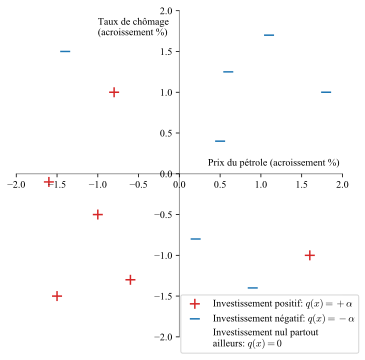

In [8]:
fig,ax = plt.subplots(1,1,subplot_kw={'aspect':1},figsize=(6,6))
ax.scatter(*Xp.T,color='C3',s=100,marker='+',
           label="Investissement positif: $q(x) = +\\alpha$")
ax.scatter(*Xn.T,color='C0',s=100,marker='_',
           label="Investissement négatif: $q(x) = -\\alpha$")
ax.scatter([0],y=[0],marker=' ',label='Investissement nul partout\nailleurs: $q(x)=0$')
center_axis(ax,lim=2)
ax.annotate('Prix du pétrole (acroissement %)',xy=(0.35,0.1))
ax.annotate('Taux de chômage\n(acroissement %)',xy=(-1.,1.7))
ax.legend(loc='lower right',bbox_to_anchor=(0, -0.05, 1.05, .102),borderaxespad=0.);

#plt.savefig('fig/pres/pres2_fr.pdf',bbox_inches='tight',pad_inches=0)



In [9]:
X = np.concatenate((Xp,Xn),axis=0)
X = np.insert(X,2,1,axis=1)
r = np.concatenate((rp,rn))

In [10]:
import helper as he
from cd.model import utility as ut
u = ut.ExpUtility(1)
lim = 2

In [11]:
[q1,q2,bias] = he.solve(X*r[:,None],u=u,lamb=0.3)[0]
xx = np.linspace(-lim,lim,100)
yy = np.linspace(-lim,lim,100)
xx,yy = np.meshgrid(xx,yy)
zz = bias + q1*xx + q2*yy

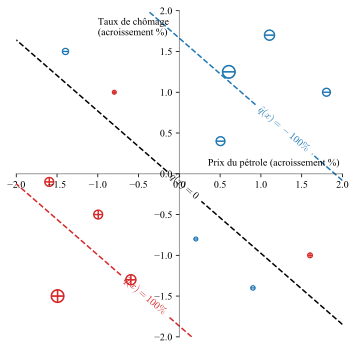

In [12]:
fig,ax = plt.subplots(1,1,subplot_kw={'aspect':1},figsize=(6,6))
ax.scatter(*Xp.T,s=100*np.abs(rp),marker='$\oplus$',color='C3',label='Rendement positif')
ax.scatter(*Xn.T,s=100*np.abs(rn),marker='$\ominus$',color='C0',label='Rendement négatif')
cont = ax.contour(xx,yy,zz,[-1,0,1],colors=('C0','k','C3'),linestyles='--')
ax.clabel(cont,fmt={-1:'$\hat q(x)=-100\%$',0:'$\hat q(x)=0$',1:'$\hat q(x)=100\%$'})
center_axis(ax,lim=2)
ax.annotate('Prix du pétrole (acroissement %)',xy=(0.35,0.1))
ax.annotate('Taux de chômage\n(acroissement %)',xy=(-1.,1.7))
# ax.legend(loc='lower right',bbox_to_anchor=(0., -0.012, 1., .102),borderaxespad=0.)

#plt.savefig('fig/pres/pres3_fr.pdf',bbox_inches='tight',pad_inches=0)
            

In [19]:
Xp = [[-1.,-1.],
      [1.,1.]]
Xn = [[-1.,1.],
      [1.,-1.]]
rp = [1,1]
rn = [-1,-1]
Xp = np.array(Xp)
Xn = np.array(Xn)
rp = np.array(rp)
rn = np.array(rn)

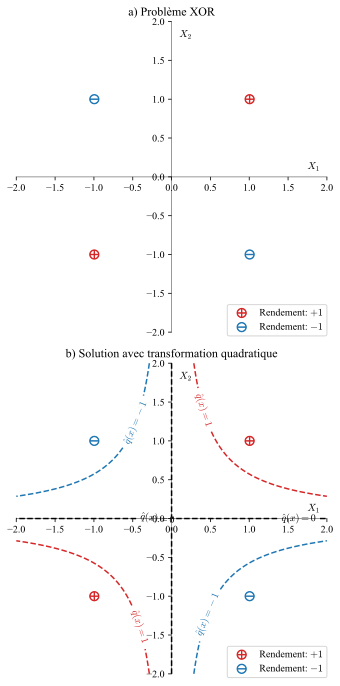

In [26]:
fig,[ax,ax2] = plt.subplots(2,1,subplot_kw={'aspect':1},figsize=(6,12))
fig.subplots_adjust(hspace=0.1)
ax.set_title('a) Problème XOR')
ax.scatter(*Xp.T,s=100,marker='$\oplus$',color='C3',label='Rendement: $+1$')
ax.scatter(*Xn.T,s=100,marker='$\ominus$',color='C0',label='Rendement: $-1$')
center_axis(ax,lim=2)
ax.annotate('$X_1$',xy=(1.75,0.1))
ax.annotate('$X_2$',xy=(0.1,1.8))
ax.legend(loc='lower right',bbox_to_anchor=(0., -0.012, 1., .102),borderaxespad=0.)

ax2.set_title('b) Solution avec transformation quadratique')
ax2.scatter(*Xp.T,s=100,marker='$\oplus$',color='C3',label='Rendement: $+1$')
ax2.scatter(*Xn.T,s=100,marker='$\ominus$',color='C0',label='Rendement: $-1$')
cont = ax2.contour(xx,yy,zz,[-1,0,1],colors=('C0','k','C3'),linestyles='--')
ax2.clabel(cont,fmt={-1:'$\hat q(x)=-1$',0:'$\hat q(x)=0$',1:'$\hat q(x)=1$'})
center_axis(ax2,lim=2)
ax2.annotate('$X_1$',xy=(1.75,0.1))
ax2.annotate('$X_2$',xy=(0.1,1.8))
ax2.legend(loc='lower right',bbox_to_anchor=(0., -0.012, 1., .102),borderaxespad=0.)

#plt.savefig('fig/pres/pres5_fr.pdf',bbox_inches='tight',pad_inches=0)

In [21]:
X = np.concatenate((Xp,Xn),axis=0)
# X = np.insert(X,2,1,axis=1)
r = np.concatenate((rp,rn))

In [15]:
def quad1(x):
    return np.array([x[0]**2,x[1]**2,x[0]*x[1],x[0],x[1],1])

In [23]:
phiX = np.apply_along_axis(quad1,1,X)

In [24]:
q = he.solve(phiX*r[:,None],u=u,lamb=0.1)[0]
xx = np.linspace(-lim,lim,100)
yy = np.linspace(-lim,lim,100)
xx,yy = np.meshgrid(xx,yy)
zz = np.apply_along_axis(quad1,0,[xx,yy]).T @ q

In [31]:
Xp = [[-1.5,-1.5],
      [-1.0,-0.5],
      [-0.6,-1.3],
      [1.6,-1],
      [-0.8,1],
      [-1.6,-0.1]]
rp = [2,1,1.3,0.3,0.2,1]

Xn = [[0.5,0.4],
      [1.1,1.7],
      [1.8,1],
      [0.6,1.25],
      [0.2,-0.8],
      [0.9,-1.4],
      [-1.4,1.5]]
rn = [-1.0,-1.3,-0.8,-2,-0.2,-0.25,-0.5]

Xp = np.array(Xp)
rp = np.array(rp)
Xn = np.array(Xn)
rn = np.array(rn)


In [32]:
X = np.concatenate((Xp,Xn),axis=0)
# X = np.insert(X,2,1,axis=1)
r = np.concatenate((rp,rn))

In [33]:
phiX = np.apply_along_axis(quad1,1,X)

In [34]:
q = he.solve(phiX*r[:,None],u=ut.ExpUtility(0.8),lamb=0.1)[0]
xx = np.linspace(-lim,lim,100)
yy = np.linspace(-lim,lim,100)
xx,yy = np.meshgrid(xx,yy)
zz = np.apply_along_axis(quad1,0,[xx,yy]).T @ q

NameError: name 'Z' is not defined

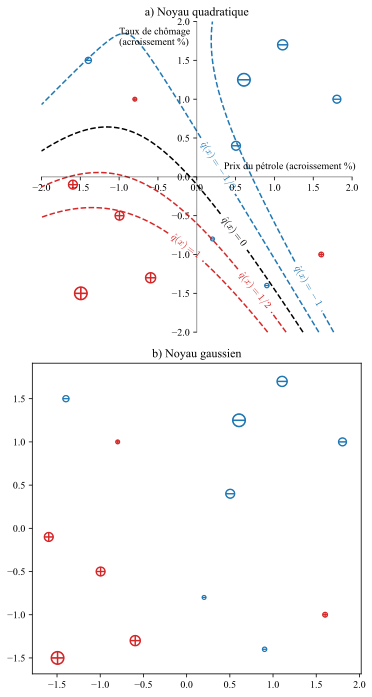

In [35]:
fig,[ax,ax2] = plt.subplots(2,1,subplot_kw={'aspect':1},figsize=(6,12))
fig.subplots_adjust(hspace=0.1)
ax.set_title('a) Noyau quadratique')
ax.scatter(*Xp.T,s=100*np.abs(rp),marker='$\oplus$',color='C3')
ax.scatter(*Xn.T,s=100*np.abs(rn),marker='$\ominus$',color='C0')
cont = ax.contour(xx,yy,zz,[-1,-0.5,0,0.5,1],colors=('C0','C0','k','C3','C3'),linestyles=('--'))
ax.clabel(cont,fmt={-1   : '$\hat q(x)=-1$',
                    -0.5 : '$\hat q(x)=-1/2$',
                    0    : '$\hat q(x)=0$',
                    0.5  : '$\hat q(x)=1/2$',
                    1    : '$\hat q(x)=1$'})
center_axis(ax,lim=2)
ax.annotate('Prix du pétrole (acroissement %)',xy=(0.35,0.1))
ax.annotate('Taux de chômage\n(acroissement %)',xy=(-1.,1.7))


ax2.set_title('b) Noyau gaussien')
ax2.scatter(*Xp.T,s=100*np.abs(rp),marker='$\oplus$',color='C3')
ax2.scatter(*Xn.T,s=100*np.abs(rn),marker='$\ominus$',color='C0')
cont = ax2.contour(xx,yy,Z,[-1,-0.5,0,0.5,1],colors=('C0','C0','k','C3','C3'),linestyles=('--'))
ax2.clabel(cont,fmt={-1   : '$\hat q(x)=-1$',
                    -0.5 : '$\hat q(x)=-1/2$',
                    0    : '$\hat q(x)=0$',
                    0.5  : '$\hat q(x)=1/2$',
                    1    : '$\hat q(x)=1$'})
center_axis(ax2,lim=2)
ax2.annotate('Prix du pétrole (acroissement %)',xy=(0.35,0.1))
ax2.annotate('Taux de chômage\n(acroissement %)',xy=(-1.,1.7))

#plt.savefig('fig/pres/pres10_fr.pdf',bbox_inches='tight',pad_inches=0)

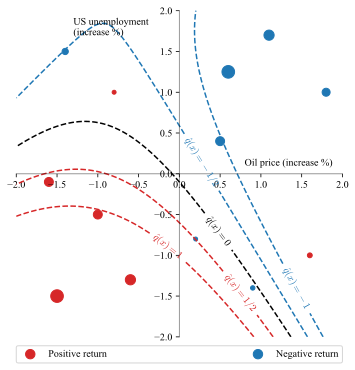

In [36]:
fig,ax = plt.subplots(1,1,subplot_kw={'aspect':1},figsize=(6,6))
ax.scatter(*Xp.T,s=80*np.abs(rp),color='C3',label='Positive return')
ax.scatter(*Xn.T,s=80*np.abs(rn),color='C0',label='Negative return')
cont = ax.contour(xx,yy,zz,[-1,-0.5,0,0.5,1],colors=('C0','C0','k','C3','C3'),linestyles=('--'))
ax.clabel(cont,fmt={-1   : '$\hat q(x)=-1$',
                    -0.5 : '$\hat q(x)=-1/2$',
                    0    : '$\hat q(x)=0$',
                    0.5  : '$\hat q(x)=1/2$',
                    1    : '$\hat q(x)=1$'})
center_axis(ax,lim=2)
ax.annotate('Oil price (increase %)',xy=(0.8,0.1))
ax.annotate('US unemployment\n(increase %)',xy=(-1.3,1.7))
ax.legend(ncol=2,mode='expand',loc='lower left',bbox_to_anchor=(0., -0.08, 1., .102),borderaxespad=0.)

# plt.savefig('fig/pres/pres6.pdf',bbox_inches='tight',pad_inches=0)

In [37]:
X = np.concatenate((Xp,Xn),axis=0)
X = np.insert(X,2,1,axis=1)
r = np.concatenate((rp,rn))

In [38]:
sigma = 0.5
def gauss_K(X1,X2=None):
    if X2 is None:
        K = np.exp(-squareform(pdist(X1))**2/sigma)
        return K
    else:
        K = np.exp(-cdist(X1,X2)**2/sigma).T
        return K

In [39]:
K = gauss_K(X)

In [40]:
a = he.solve_k(K,r,u,lamb=0.1)*8

In [41]:
delta = 100
xx1 = np.linspace(-lim,lim,delta)
xx2 = np.linspace(-lim,lim,delta)
X_s = np.array(np.meshgrid(xx1,xx2,[1])).T[0].reshape((100*100,3))
phi = gauss_K(X,X_s)
Z = np.inner(phi,a).reshape((delta,delta)).T

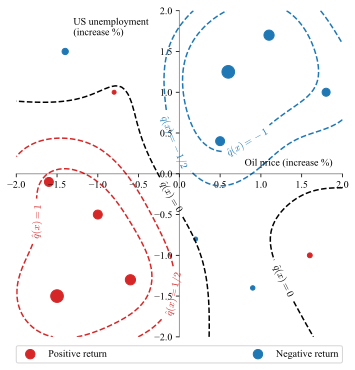

In [42]:
fig,ax = plt.subplots(1,1,subplot_kw={'aspect':1},figsize=(6,6))
ax.scatter(*Xp.T,s=80*np.abs(rp),color='C3',label='Positive return')
ax.scatter(*Xn.T,s=80*np.abs(rn),color='C0',label='Negative return')
cont = ax.contour(xx,yy,Z,[-1,-0.5,0,0.5,1],colors=('C0','C0','k','C3','C3'),linestyles=('--'))
ax.clabel(cont,fmt={-1   : '$\hat q(x)=-1$',
                    -0.5 : '$\hat q(x)=-1/2$',
                    0    : '$\hat q(x)=0$',
                    0.5  : '$\hat q(x)=1/2$',
                    1    : '$\hat q(x)=1$'})
center_axis(ax,lim=2)
ax.annotate('Oil price (increase %)',xy=(0.8,0.1))
ax.annotate('US unemployment\n(increase %)',xy=(-1.3,1.7))
ax.legend(ncol=2,mode='expand',loc='lower left',bbox_to_anchor=(0., -0.08, 1., .102),borderaxespad=0.)

# plt.savefig('fig/pres/pres7.pdf',bbox_inches='tight',pad_inches=0)

array([[-2.        , -2.        ,  1.        ],
       [-2.        , -1.95959596,  1.        ],
       [-2.        , -1.91919192,  1.        ],
       ..., 
       [ 2.        ,  1.91919192,  1.        ],
       [ 2.        ,  1.95959596,  1.        ],
       [ 2.        ,  2.        ,  1.        ]])